<a href="https://colab.research.google.com/github/ihsanmauri/Telkom-Digital-Talent-Incubator/blob/master/Bank_Marketing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikasi**
Pada dataset ini diklasifikasikan dan dimodelkan dengan pendekatan 3 model yang berbeda. Pertama akan menggunakan SVM, kNN, dan Naive Bayes. 

[Bank Marketing Dataset](https://www.kaggle.com/janiobachmann/bank-marketing-dataset) adalah data yang digunakan sebagai dataset analisa kali ini. Tujuan dari proses klasifikasi ini adalah untuk menentukan apakah customer akan melakukan subscribe term deposit atau tidak. Berikut dibawah ini merupakan penjelasan dari tiap atribut:

**(Feature)**
1.   Age: Usia dari nasabah
2.   Job: Pekerjaan nasabah
3.   Marital: Status dari nasabah
4.   Education: Tingakatan pendidikan terakhir nasabah
5.   Default: Ketidakmampuan nasabah untuk membayar utang
6.   Balance: Jumlah uang yang dimilik nasabah di bank
7.   Housing: Punya pinjaman rumah?
8.   Loan: Mempunyai pinjaman atau tidak
9.   Contact: Jenis kontak yang dapat dihubungi
10.  Day: Hari terakhir kontak
11.  Month: Bulan terakhir kontak
12.  Duration: Durasi terakhir kontak (dalam detik)
13.  Campaign: Berapa kali nasabah dikontak dalam kampanye ini
14.  pdays: Lamanya hari terakhir kontak dari kampanye terakhir
15.  previous: Jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini
16.  poutcome: outcome dari kampanye pemasaran terakhir 
**(Label)**
1.   Deposit: Apakah klien pernah melakukan subscribe term deposit ? (Yes/No)

# **Explorasi Data**
Sebelum masuk ke dalam proses perbandingan model, dilakukan explorasi data terlebih dahulu untuk melihat informasi yang dapat diambil dari dataset, sehingga dapat dijadikan patokan untuk proses analisa data

Import Library

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [ ]:
# Import Data to Google Colab
df = pd.read_csv('https://raw.githubusercontent.com/ihsanmauri/Telkom-Digital-Talent-Incubator/master/Klasifikasi/bank.csv', sep = ',')
df

# Show the Data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Prints the Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
# Prints Descriptive Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [ ]:
# Checking the Rows and Columns
df.shape

(11162, 17)

In [ ]:
# Find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [ ]:
# Find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [ ]:
# Find feature with one-value
for column in df.columns:
    print(column,df[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


Dalam data ini tidak ada fitur dengan one-value

In [ ]:
# Categorical Exploration
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


Pada dataset ini, ada total 9 kategorikal. Serta fitur job dan bulan mempunyai jumlah fitur tertinggi

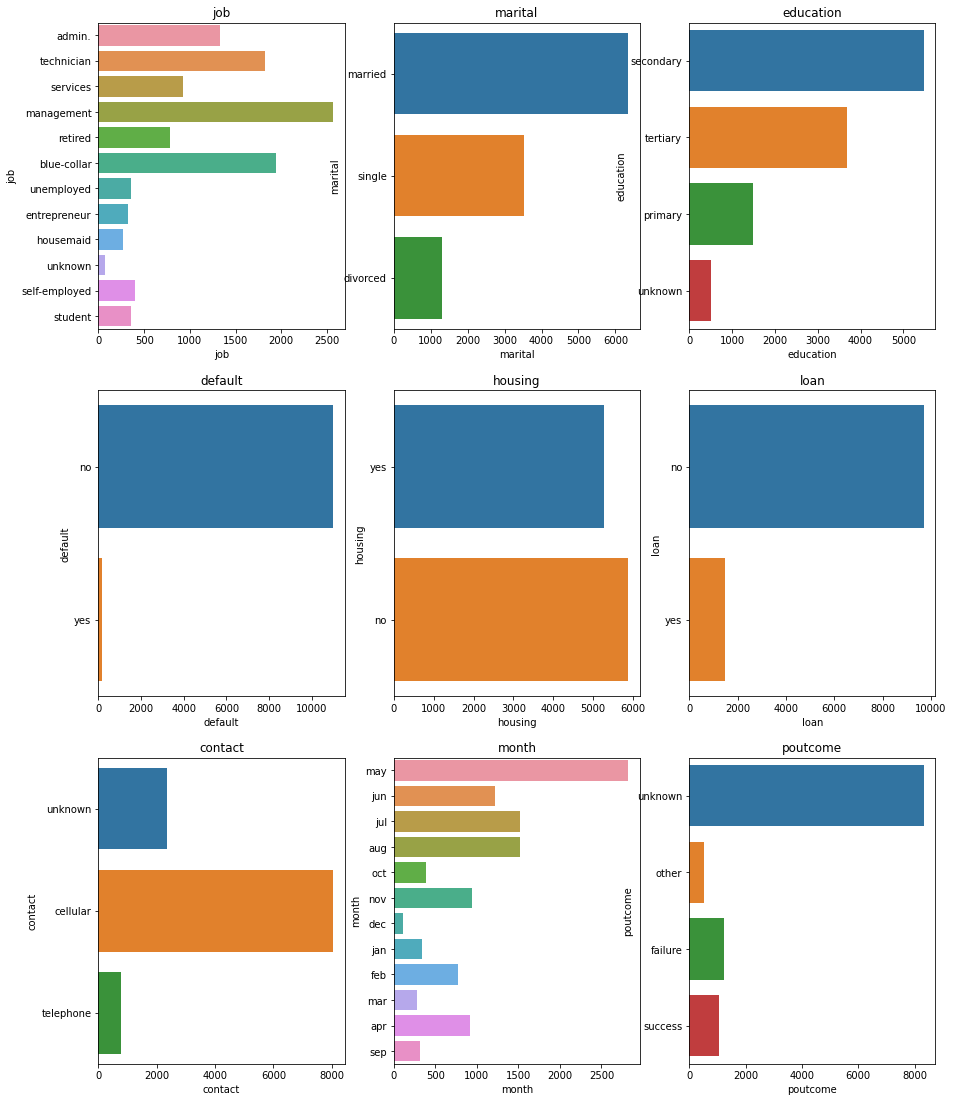

In [ ]:
# Check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()



*   Client dengan job management tertinggi, sedangkan housemaid terendah
*   Client dengan status married tertinggi, sedangkan divorced terendah 
*   Client dengan education secondary mempunyai nilai paling tinggi 
*   Default berstatus No sangat jauh nilainya dibandingkan yang Yes, sehingga tidak akan mempengaruhi terhadap pemodelan

In [ ]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# Visualize the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [ ]:
# Checking discrete
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [ ]:
# Checking continuous
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

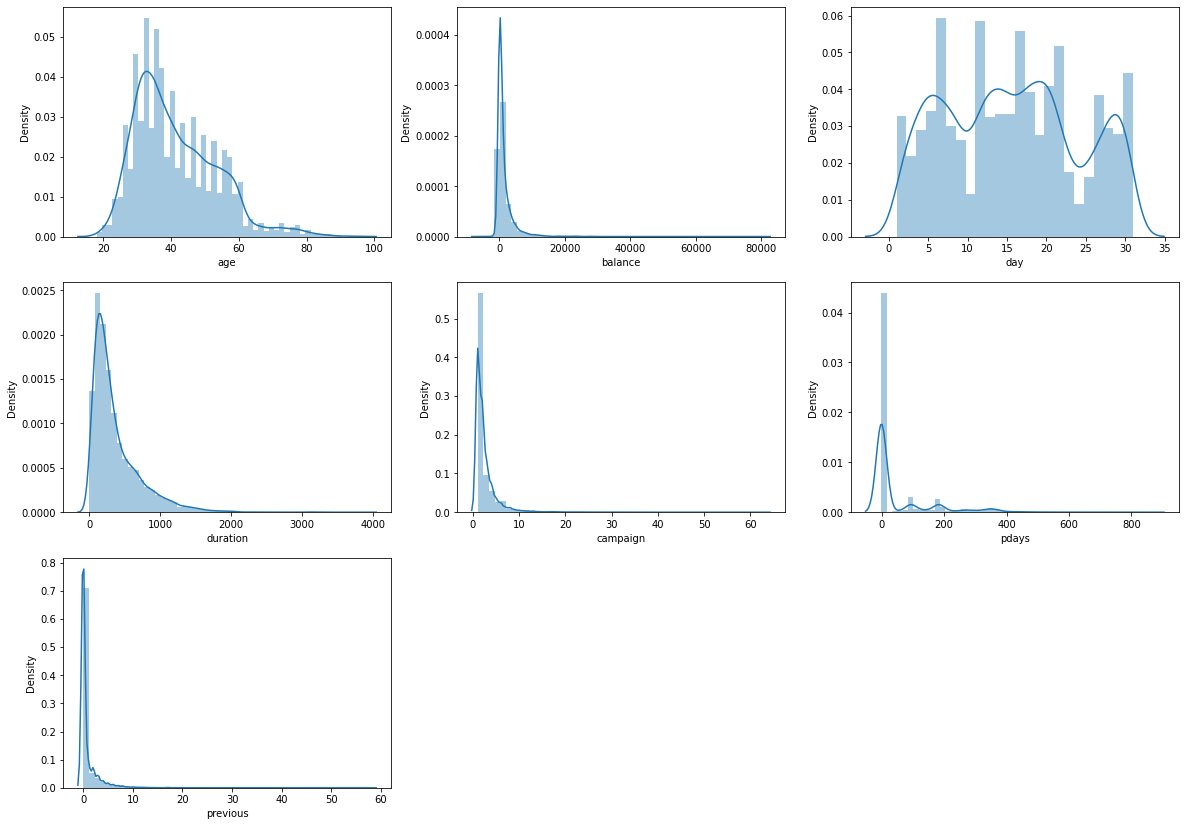

In [ ]:
# Plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

Age terdistribusi normal, namun variabel sisanya nampak masih ada outlier

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

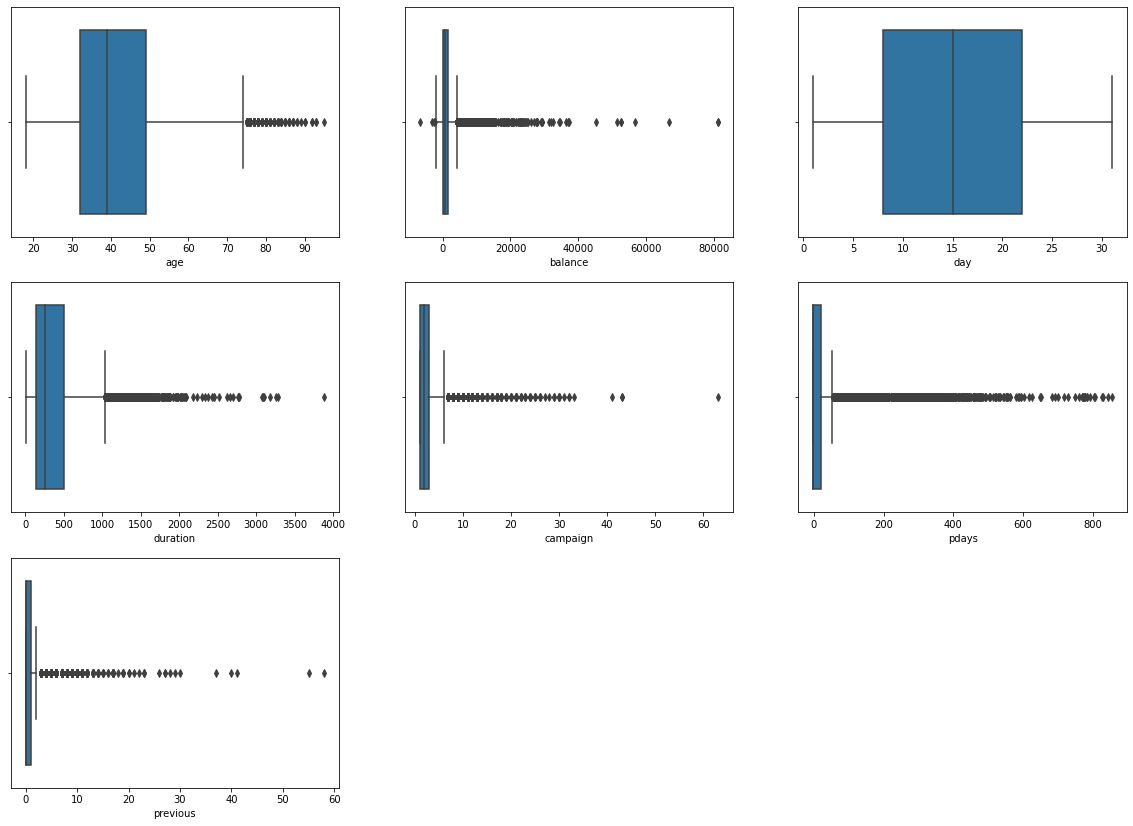

In [ ]:
# Boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

age, balance, duration, campaign, pdays dan previous mempunyai outliers

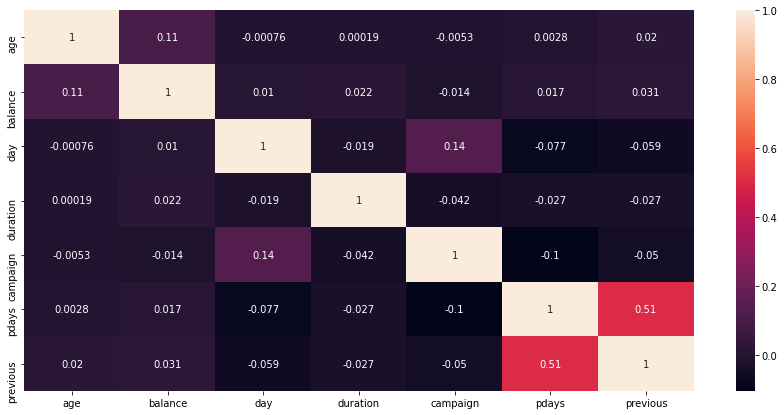

In [ ]:
# Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

Pada tabel korelasi, antara variabel tidak mempengaruhi satu sama lain

# **Feature Engineering**
Pada proses kali ini dilakukannya data preprocessing, dimana langkah-langkahnya termasuk:


1.   Drop fitur yang tidak digunakan
2.   Handle nilai yang hilang
3.   Handle fitur kategorikal
4.   Handle feature scaling
5.   Menghilangkan Outliers

Sebagaimana yang telah dilakukan di bagian eksplorasi data:

1.   Tidak ada value yang hilang
2.   Tidak ada feature dengan value 1
3.   Ada 9 kategorikal data
4.   Default tidak mempunyai peran yang penting
5.   Ada outliers pada fitur age, balance, duration, compaign, pdays dan previous



In [ ]:
df2=df.copy()

In [ ]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Default features does not play important role
df2.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [ ]:
df2.drop(['default'],axis=1, inplace=True)

In [ ]:
df2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [ ]:
# Drop pdays as it has -1 value and lots of them
df2.drop(['pdays'],axis=1, inplace=True)

In [ ]:
# Remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()
# These can be ignored and values lies in between 18 to 95

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [ ]:
# Remove outliers in feature balance...
df2.groupby(['deposit','balance'],sort=True)['balance'].count()
# These outlier should not be remove as balance goes high, client show interest on deposit

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [ ]:
# Remove outliers in feature duration...
df2.groupby(['deposit','duration'],sort=True)['duration'].count()
# These outlier should not be remove as duration goes high, client show interest on deposit

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [ ]:
# Remove outliers in feature campaign...
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [ ]:
# Assuming campaign count greater than 32 are as outliers
df3 = df2[df2['campaign'] < 33]

In [ ]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [ ]:
# Remove outliers in feature previous...
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [ ]:
df4 = df3[df3['previous'] < 31]

In [ ]:
# Handle categorical features
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [ ]:
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [ ]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


# **Membuat Data Test dan Data Training**

In [ ]:
X = df4.drop(['deposit_new'],axis=1)
y = df4['deposit_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
len(X_train)

8921

In [ ]:
len(X_test)

2231

# **1. Support Vector Machine**
SVM atau Support Vector Machine merupakan salah satu algoritma supervised learning yang digunakan untuk klasifikasi, regresi, dan deteksi outliers. Dalam pemodelan klasifikasi, SVM memiliki konsep yang lebih matang dan lebih jelas secara matematis dibandingkan dengan teknik-teknik klasifikasi lainnya. SVM juga dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non linear.

Secara garis besar SVM mempunyai kelebihan:


*   Efektif dalam dimensi bertingkat tinggi
*   Masih efektif ketika sebuah kasus dimensinya lebih tinggi ketimbang jumlah sampel
*   Menggunakan subset poin training yang dinamakan juga dengan support vector sehingga memory efficient
*   Versatile: kernel function dapat digunakan untuk kasus khusus

Dan kekurangannya:



*   Jika jumlah fitur lebih besar daripada sampel, dapat terjadinya over-fitting, maka disarankan memilih dengan benar kernel function dan regularization term
*   SVM tidak menunjukkan estimasi probabilitas





SVM (LinearSVC)

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
lin_clf = svm.LinearSVC()

#Train the model using the training sets
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
#Predict the response for test dataset
y_pred_lin_clf = lin_clf.predict(X_test)

Evaluasi Model

In [ ]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_lin_clf = metrics.confusion_matrix(y_test, y_pred_lin_clf)
cm_lin_clf

array([[958, 221],
       [621, 431]])

In [ ]:
# Show the Accuracy, Precision, Recall
acc_lin_clf = metrics.accuracy_score(y_test, y_pred_lin_clf)
prec_lin_clf = metrics.precision_score(y_test, y_pred_lin_clf)
rec_lin_clf = metrics.recall_score(y_test, y_pred_lin_clf)
f1_lin_clf = metrics.f1_score(y_test, y_pred_lin_clf)
kappa_lin_clf = metrics.cohen_kappa_score(y_test, y_pred_lin_clf)

print("Accuracy:", acc_lin_clf)
print("Precision:", prec_lin_clf)
print("Recall:", rec_lin_clf)
print("F1 Score:", f1_lin_clf)
print("Cohens Kappa Score:", kappa_lin_clf)

Accuracy: 0.6225907664724338
Precision: 0.661042944785276
Recall: 0.4096958174904943
F1 Score: 0.505868544600939
Cohens Kappa Score: 0.226895369855166


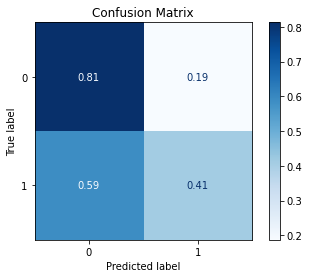

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
# Predict the test set
predictions = lin_clf.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(lin_clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

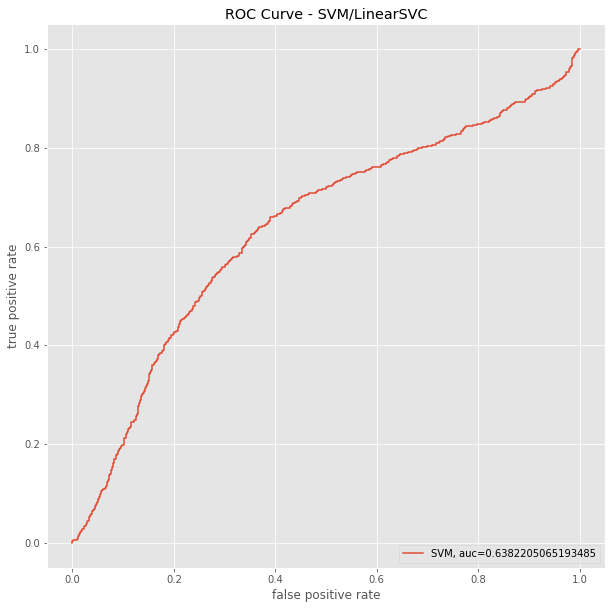

In [ ]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_lin_clf_proba = lin_clf._predict_proba_lr(X_test)[::,1]
fprlin_clf, tprlin_clf, _ = metrics.roc_curve(y_test,  y_pred_lin_clf_proba)
auclin_clf = metrics.roc_auc_score(y_test, y_pred_lin_clf_proba)
plt.plot(fprlin_clf,tprlin_clf,label="SVM, auc="+str(auclin_clf))
plt.title('ROC Curve - SVM/LinearSVC')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# **2. Nearest Neighbour**
K-nearest neighbors atau knn adalah algoritma yang berfungsi untuk melakukan klasifikasi suatu data berdasarkan data pembelajaran (train data sets), yang diambil dari k tetangga terdekatnya (nearest neighbors). Dengan k merupakan banyaknya tetangga terdekat.

Untuk menggunakan algoritma k nearest neighbors, perlu ditentukan banyaknya k tetangga terdekat yang digunakan untuk melakukan klasifikasi data baru. Banyaknya k, sebaiknya merupakan angka ganjil, misalnya k = 1, 2, 3, dan seterusnya. Penentuan nilai k dipertimbangkan berdasarkan banyaknya data yang ada dan ukuran dimensi yang dibentuk oleh data. Semakin banyak data yang ada, angka k yang dipilih sebaiknya semakin rendah. Namun, semakin besar ukuran dimensi data, angka k yang dipilih sebaiknya semakin tinggi.




In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30)

#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Predict the response for test dataset
y_pred_knn = knn.predict(X_test)

Evaluasi Model

In [ ]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[885, 294],
       [344, 708]])

In [ ]:
# Show the Accuracy, Precision, Recall
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
prec_knn = metrics.precision_score(y_test, y_pred_knn)
rec_knn = metrics.recall_score(y_test, y_pred_knn)
f1_knn = metrics.f1_score(y_test, y_pred_knn)
kappa_knn = metrics.cohen_kappa_score(y_test, y_pred_knn)

print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1 Score:", f1_knn)
print("Cohens Kappa Score:", kappa_knn)

Accuracy: 0.7140295831465711
Precision: 0.7065868263473054
Recall: 0.6730038022813688
F1 Score: 0.6893865628042842
Cohens Kappa Score: 0.4247271716137231


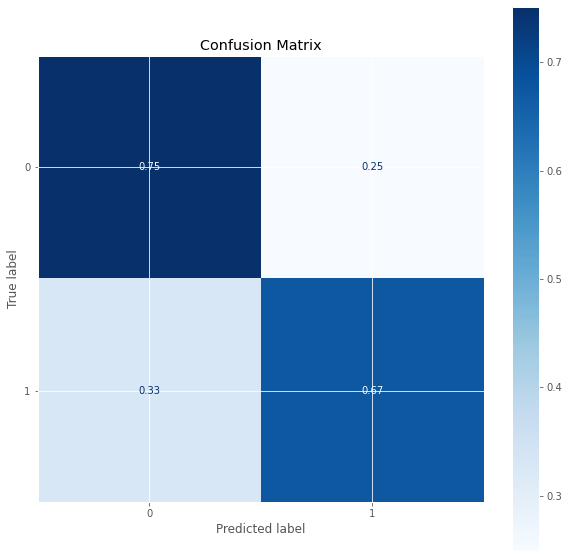

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
# Predict the test set
predictions = knn.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(knn, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

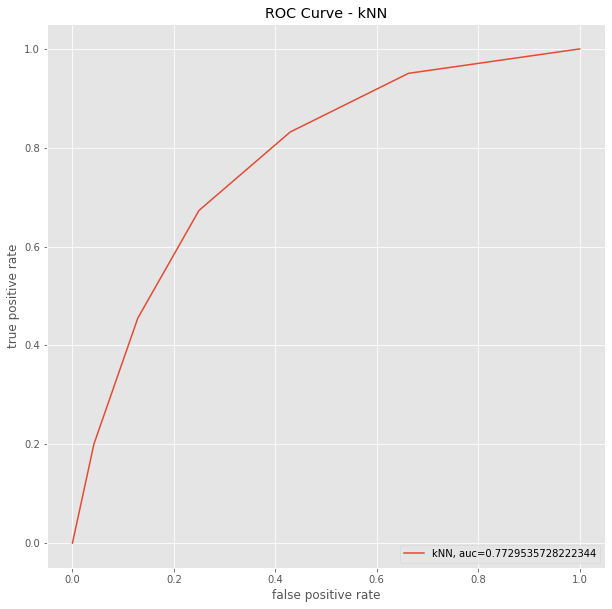

In [ ]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_knn_proba = knn.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fprknn,tprknn,label="kNN, auc="+str(aucknn))
plt.title('ROC Curve - kNN')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# **3. Naive Bayes**
Naive Bayes adalah metode supervised learning, dengan basis penggunaan Bayes’ theorem dengan asumsi “naive” bahwasannya terdapat independensi antara fitur satu dengan yang lainnya. 

Naive Bayes learnes dan classifiers sangat berguna sekali dibandingkan metode yang lebih canggih lainnya. Proses pemutusan dari distribusi fitur kelas yang kondisional berarti setiap distribusi dapat diestimasikan secara independen sebagai satu dimensi distribusi. Ini sangat berguna untuk melihat masalah stemming dari curse of dimensionality.

In [ ]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

In [ ]:
#Predict the response for test dataset
y_pred_gnb = gnb.predict(X_test)

Model Evaluation

In [ ]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[1025,  154],
       [ 436,  616]])

In [ ]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7355445988346033
Precision: 0.8
Recall: 0.5855513307984791
F1 Score: 0.6761800219538968
Cohens Kappa Score: 0.4615964810238211


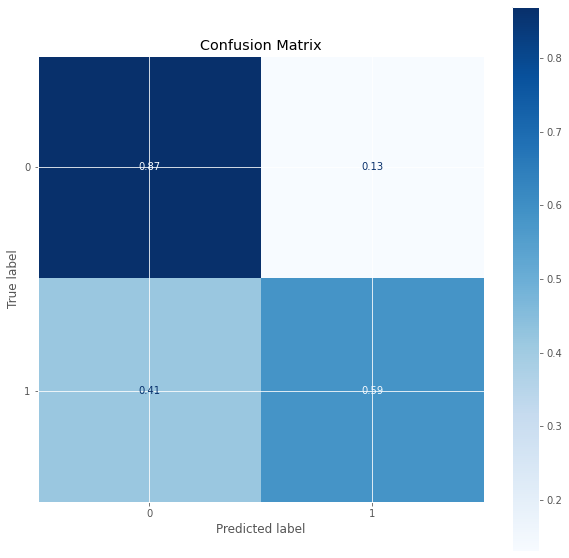

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
# Predict the test set
predictions = gnb.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(gnb, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

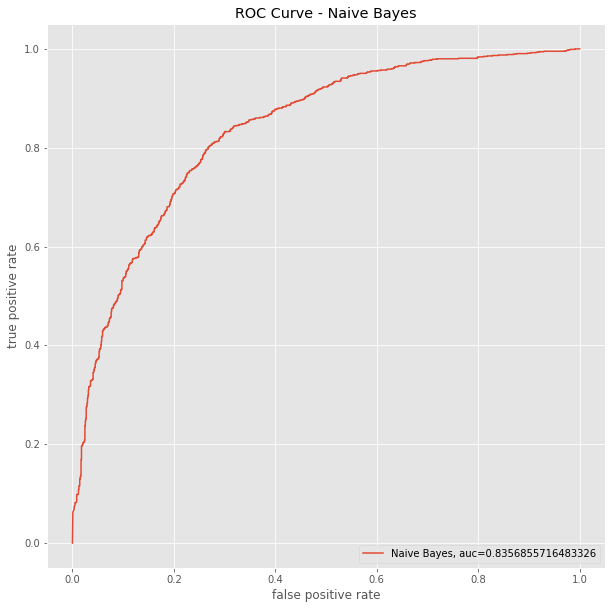

In [ ]:
# ROC Curve
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# **Komparasi Model**

In [ ]:
# Comparing Model Performance
print("SVM Accuracy =",acc_lin_clf)
print("SVM Precision =",prec_lin_clf)
print("SVM Recall =",rec_lin_clf)
print("SVM F1-Score =", f1_lin_clf)
print("_______________________")
print("kNN Accuracy =", acc_knn)
print("kNN Precision =", prec_knn)
print("kNN Recall =", rec_knn)
print("kNN F1-Score =", f1_knn)
print("_______________________")
print("Naive Bayes Accuracy =", acc_gnb)
print("Naive Bayes Precision =", prec_gnb)
print("Naive Bayes Recall =", rec_gnb)
print("Naive Bayes F1-Score =", f1_gnb)

SVM Accuracy = 0.6225907664724338
SVM Precision = 0.661042944785276
SVM Recall = 0.4096958174904943
SVM F1-Score = 0.505868544600939
_______________________
kNN Accuracy = 0.7140295831465711
kNN Precision = 0.7065868263473054
kNN Recall = 0.6730038022813688
kNN F1-Score = 0.6893865628042842
_______________________
Naive Bayes Accuracy = 0.7355445988346033
Naive Bayes Precision = 0.8
Naive Bayes Recall = 0.5855513307984791
Naive Bayes F1-Score = 0.6761800219538968


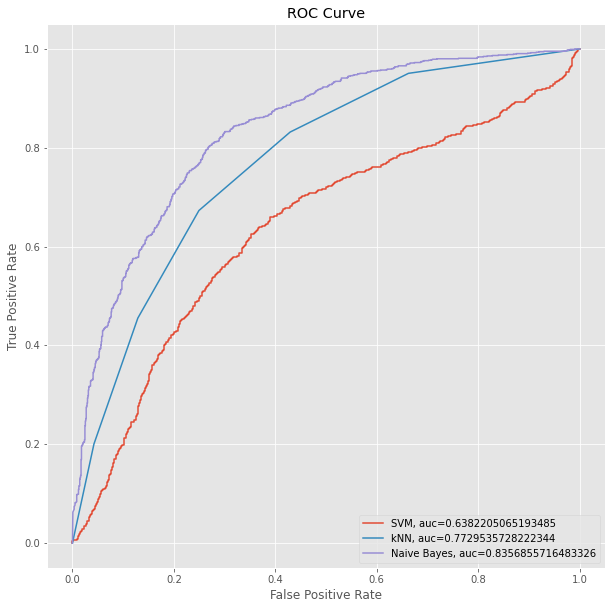

In [ ]:
# Comparing ROC Curve
plt.plot(fprlin_clf,tprlin_clf,label="SVM, auc="+str(auclin_clf))
plt.plot(fprknn,tprknn,label="kNN, auc="+str(aucknn))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# Create Datafame Contains Fature and Result of prediction
df4_compare = X_test.copy()
df4_compare['ActualClass'] = y_test
df4_compare['SVM'] = y_pred_lin_clf
df4_compare['kNN'] = y_pred_knn
df4_compare['Naive_Bayes'] = y_pred_gnb

In [ ]:
df4_compare.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,ActualClass,SVM,kNN,Naive_Bayes
7351,56,1561,13,75,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9132,53,136,15,99,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
9221,30,-218,27,13,15,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4548,72,763,24,384,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
10563,38,0,16,284,8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [ ]:
df4_compare.groupby(['SVM'],sort=True)['SVM'].count()

SVM
0    1579
1     652
Name: SVM, dtype: int64

In [ ]:
df4_compare.groupby(['kNN'],sort=True)['kNN'].count()

kNN
0    1229
1    1002
Name: kNN, dtype: int64

In [ ]:
df4_compare.groupby(['Naive_Bayes'],sort=True)['Naive_Bayes'].count()

Naive_Bayes
0    1461
1     770
Name: Naive_Bayes, dtype: int64

# **Kesimpulan**
Berdasarkan hasil evaluasi dan komparasi model, maka setelah diurutkan dari nilai yang tertinggi adalah:


1.   Accuracy: 0,734 (Naive Bayes)
2.   Precision: 0,8 (Naive Bayes)
3.   Recall: 0,673 (kNN)
4.   F1-Score: 0,69 (kNN)
5.   CM & ROC: Naive Bayes

Dapat disimpulkan bahwa, algoritma yang paling tepat untuk memprediksi output dari dataset ini adalah Naive Bayes. Tapi dapat dijadikan konsiderasi bahwasannya kNN dapat melampaui Naive Bayes, karena angka neighbourhood yang dipakai adalah 5



